In [91]:
import pandas as pd
baseline_period = 5.708/(10**9)
baseline = pd.read_csv("inorder_baseline.csv")
baseline = baseline.set_index("program")
baseline["MIPS"] = 1/(baseline["cpi"]*baseline_period*10**6)
baseline_no = baseline.drop(columns=["mem_instructions", "total_instructions"])
print(baseline_no.to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrr}
\toprule
 & cpi & MIPS \\
program &  &  \\
\midrule
copy & 1.75 & 100.22 \\
fib rec & 2.07 & 84.60 \\
alexnet & 1.70 & 103.00 \\
knight tour & 1.81 & 96.60 \\
bfs & 1.74 & 100.59 \\
prio queue & 1.94 & 90.49 \\
\bottomrule
\end{tabular}



In [92]:
baseline_stall = baseline.copy()
baseline_stall["cpi_3"] = baseline["cpi"] + (baseline["total_instructions"]+baseline["mem_instructions"]) * 3/baseline["total_instructions"]
baseline_stall["cpi_5"] = baseline["cpi"] + (baseline["total_instructions"]+baseline["mem_instructions"]) * 5/baseline["total_instructions"]
baseline_stall["MIPS_3"] = 1/(baseline_stall["cpi_3"]*baseline_period*10**6)
baseline_stall["MIPS_5"] = 1/(baseline_stall["cpi_5"]*baseline_period*10**6)
baseline_stall = baseline_stall.drop(columns=["mem_instructions", "total_instructions", "cpi", "cpi_3", "cpi_5"])
print(baseline_stall.to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrrr}
\toprule
 & MIPS & MIPS_3 & MIPS_5 \\
program &  &  &  \\
\midrule
copy & 100.22 & 29.96 & 20.42 \\
fib rec & 84.60 & 29.26 & 20.37 \\
alexnet & 103.00 & 29.37 & 19.89 \\
knight tour & 96.60 & 27.98 & 18.99 \\
bfs & 100.59 & 29.36 & 19.94 \\
prio queue & 90.49 & 26.37 & 17.91 \\
\bottomrule
\end{tabular}



In [93]:
baseline_optimized = baseline.copy()

baseline_optimized["cpi_3"] = baseline["cpi"] + (baseline["mem_instructions"]) * 3/baseline["total_instructions"]
baseline_optimized["cpi_5"] = baseline["cpi"] + (baseline["mem_instructions"]) * 5/baseline["total_instructions"]
baseline_optimized["MIPS_3"] = 1/(baseline_optimized["cpi_3"]*baseline_period*10**6)
baseline_optimized["MIPS_5"] = 1/(baseline_optimized["cpi_5"]*baseline_period*10**6)
baseline_optimized = baseline_optimized.drop(columns=["mem_instructions", "total_instructions", "cpi", "cpi_3", "cpi_5"])
print(baseline_optimized.to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrrr}
\toprule
 & MIPS & MIPS_3 & MIPS_5 \\
program &  &  &  \\
\midrule
copy & 100.22 & 61.53 & 48.93 \\
fib rec & 84.60 & 58.64 & 48.68 \\
alexnet & 103.00 & 59.10 & 46.02 \\
knight tour & 96.60 & 53.71 & 41.44 \\
bfs & 100.59 & 59.04 & 46.29 \\
prio queue & 90.49 & 48.07 & 36.63 \\
\bottomrule
\end{tabular}



In [94]:
o3_period = 3.069/(10**9)
o3 = pd.read_csv("advanced_o3_0_delay.csv")
o3 = o3.join(pd.read_csv("advanced_o3_5_delay.csv"), rsuffix="_3")
o3 = o3.join(pd.read_csv("advanced_o3_9_delay.csv"), rsuffix="_5")
o3 = o3.set_index("program")
o3["MIPS"] =  1/(o3["cpi"]*o3_period*10**6)
o3["MIPS_3"] = 1/(o3["cpi3"]*o3_period*10**6)
o3["MIPS_5"] = 1/(o3["cpi5"]*o3_period*10**6)
o3 = o3.drop(columns=["program_3", "program_5", "cpi", "cpi3", "cpi5", "inst_count","inst_count_3", "inst_count_5", "branch_accuracy", "branch_accuracy_3", "branch_accuracy_5"])
print(o3.to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrrr}
\toprule
 & MIPS & MIPS_3 & MIPS_5 \\
program &  &  &  \\
\midrule
copy & 169.38 & 121.96 & 88.56 \\
fib rec & 181.50 & 100.16 & 65.83 \\
alexnet & 200.13 & 114.45 & 73.20 \\
knight tour & 202.40 & 111.48 & 72.06 \\
bfs & 212.85 & 113.52 & 75.47 \\
prio queue & 187.19 & 94.38 & 60.76 \\
\bottomrule
\end{tabular}



,MIPS,MIPS_3,MIPS_5,model
program,,,,
copy,169.384589,121.956884,88.557920,o3
fib rec,181.499029,100.163426,65.831800,o3
alexnet,200.134903,114.451045,73.202713,o3
knight tour,202.395180,111.482230,72.056224,o3
bfs,212.846494,113.523786,75.473660,o3
prio queue,187.186895,94.376478,60.763113,o3
copy,100.219389,29.961154,20.418367,stallall
fib rec,84.603344,29.258326,20.373265,stallall
alexnet,103.003701,29.372975,19.892881,stallall


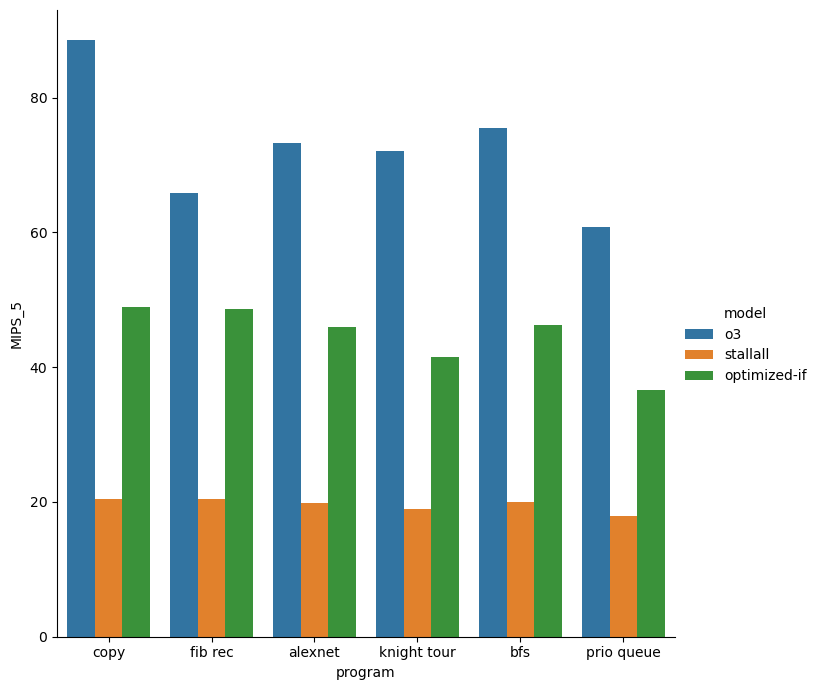

In [99]:
import seaborn as sns
o3["model"] = "o3"
baseline_stall["model"] = "stallall"
baseline_optimized["model"] = "optimized-if"
comb = pd.concat([o3,baseline_stall, baseline_optimized])
g = sns.catplot(data=comb, kind="bar", x="program", y="MIPS_5", hue="model", height=7)
comb

In [112]:
not_taken = pd.read_csv("bp_nottaken_o3_5_delay.csv")
not_taken["predictor"] = "not taken"
not_taken["cycles"] = not_taken["inst_count"]*not_taken["cpi"]
bimod = pd.read_csv("bp_bimod_o3_5_delay.csv")
bimod["predictor"] = "bimod"
bimod["cycles"] = bimod["inst_count"]*bimod["cpi"]
tournament = pd.read_csv("bp_tournament_o3_5_delay.csv")
tournament["predictor"] = "tournament"
tournament["cycles"] = tournament["inst_count"]*tournament["cpi"]
bp = pd.concat([not_taken, bimod, tournament])
bp = bp.groupby("predictor").sum()
bp["cpi"] = bp["cycles"]/bp["inst_count"]
bp["misprediction rate"] = bp["misprediction_count"]/bp["branch_count"]
bp = bp.drop(columns=["program","inst_count", "misprediction_count","cycles","branch_count"])
print(bp.to_latex(float_format="{:.2f}".format))

\begin{tabular}{lrr}
\toprule
 & cpi & misprediction rate \\
predictor &  &  \\
\midrule
bimod & 2.89 & 0.19 \\
not taken & 3.12 & 0.59 \\
tournament & 2.87 & 0.17 \\
\bottomrule
\end{tabular}



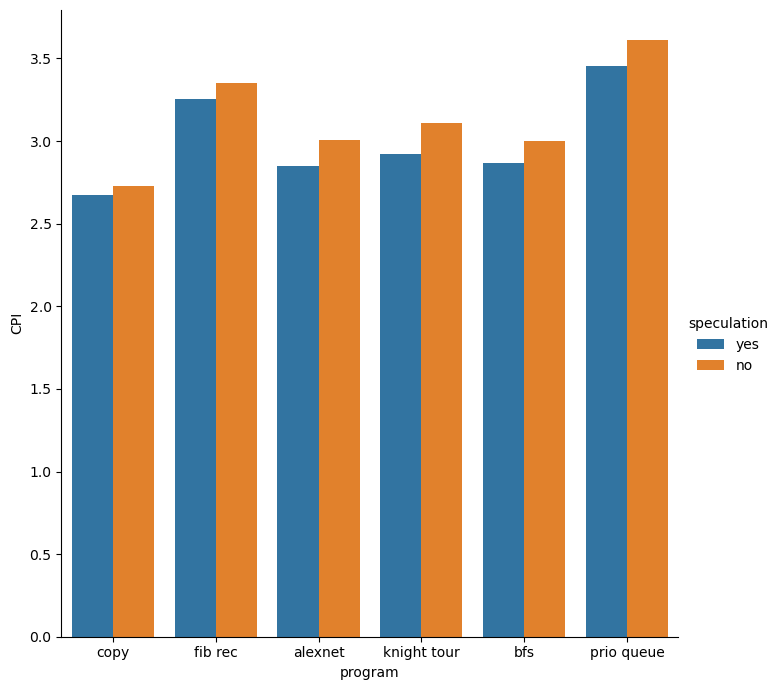

In [118]:
spec = pd.read_csv("advanced_o3_5_delay.csv")
spec["speculation"] = "yes"
nospec = pd.read_csv("nospec_o3_5_delay.csv")
nospec["speculation"] = "no"
sp = pd.concat([spec,nospec])
g = sns.catplot(data=sp, kind="bar", x="program", y="cpi3", hue="speculation", height=7)
g.set_ylabels(label="CPI")
